In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
model = load_model('model_CNN_1_data.h5')

2021-12-02 17:38:29.266153: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# load the test set for prediction
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'
image_gen = ImageDataGenerator(rescale=1./255)
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=80,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
prediction = model.predict(test_generator)
prediction = np.round(prediction).astype(int)
y_true = test_generator.labels

Found 1045 images belonging to 2 classes.


2021-12-02 17:38:32.152531: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [4]:
type(prediction)

numpy.ndarray

In [5]:
type((y_true))

numpy.ndarray

In [6]:
confusion_matrix(y_true, prediction)

array([[259,  10],
       [ 27, 749]])

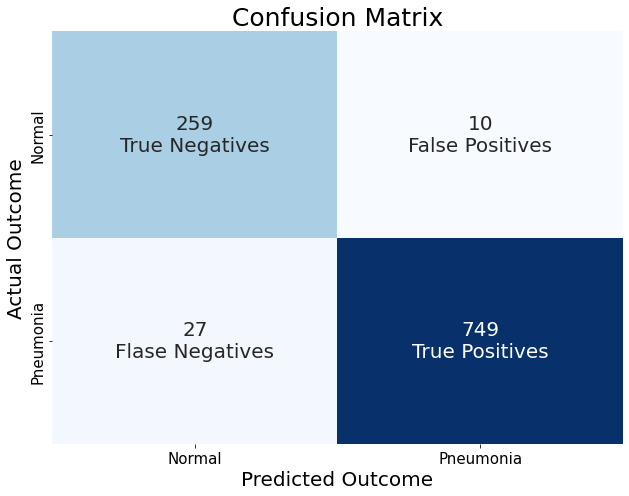

In [7]:
# plotting confusion matrix
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues",cbar=False)
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [8]:
#print(classification_report(y_true, prediction))

## Groing through False Positive & False Negative pictures

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from keras.preprocessing import image

In [11]:
#file paths
normal_chest_xray = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/IM-0177-0001.jpeg'
pneumonia_chest_xray = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person30_bacteria_145.jpeg'

In [13]:
#test_normal = 
#test_pneumonia = 

In [14]:
def pneumonia_detector(file, model):
    """
    The function returns the prediction of pneumonia.
    
    parameters: 
        file: image file path 
        model: mask detector model
    
    output: 
        prediction: if the person has pneumonia or not
    """
    img = image.load_img(file, target_size=(150,150))
    new_img = image.img_to_array(img)
    new_img = np.expand_dims(new_img, axis=0)
    new_img = new_img/255
    
    labels = {0:"Normal", 1:"Pneumonia"}
    prediction_class =np.round(model.predict(new_img)[0][0]).astype(int)
    prediction = labels[prediction_class]
    #print(model.predict(new_img)[0][0])
    #print(new_img)
    print(f'Chest X-ray Status = {prediction}')
    plt.imshow(img)

Chest X-ray Status = Normal


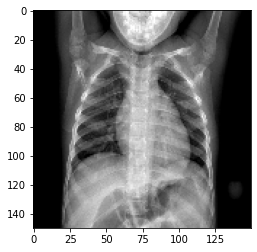

In [15]:
pneumonia_detector(normal_chest_xray, model)

Chest X-ray Status = Pneumonia


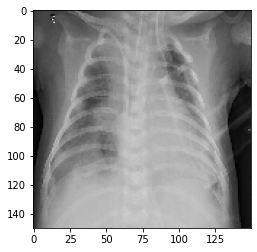

In [16]:
pneumonia_detector(pneumonia_chest_xray, model)

## Prediction results 

In [17]:
filenames = [x for x in test_generator.filenames]
label = [x for x in y_true]
predict = [x[0] for x in prediction]

import pandas as pd
df = pd.DataFrame(list(zip(filenames, label, predict)), columns=['Filenames', 'Label', 'Predict'])
df.head()

,Filenames,Label,Predict
0,NORMAL/IM-0115-0001.jpeg,0,0
1,NORMAL/IM-0127-0001.jpeg,0,0
2,NORMAL/IM-0143-0001.jpeg,0,0
3,NORMAL/IM-0162-0001.jpeg,0,0
4,NORMAL/IM-0164-0001.jpeg,0,0


In [18]:
# function to add "Outcome" column
def predict_outcome(row):
    if (row['Label'] == 0) & (row['Predict'] == 0):
        return "TN"
    elif (row['Label'] == 0) & (row['Predict'] == 1):
        return "FP"
    elif (row['Label'] == 1) & (row['Predict'] == 1):
        return "TP"
    elif (row['Label'] == 1) & (row['Predict'] == 0):
        return "FN"

# applying function
df['Outcome'] = df.apply (lambda row: predict_outcome(row), axis=1)

In [19]:
# Sanity check
df.sample(5)

,Filenames,Label,Predict,Outcome
401,PNEUMONIA/person1340_virus_2312.jpeg,1,1,TP
958,PNEUMONIA/person730_virus_1351.jpeg,1,0,FN
902,PNEUMONIA/person612_virus_1179.jpeg,1,1,TP
681,PNEUMONIA/person364_virus_743.jpeg,1,1,TP
38,NORMAL/IM-0333-0001.jpeg,0,0,TN


In [20]:
df.Outcome.value_counts()

TP    749
TN    259
FN     27
FP     10
Name: Outcome, dtype: int64

## True Positive 

In [21]:
## False Positives
df[df["Outcome"]=="TP"]

,Filenames,Label,Predict,Outcome
269,PNEUMONIA/person1000_bacteria_2931.jpeg,1,1,TP
270,PNEUMONIA/person1004_bacteria_2935.jpeg,1,1,TP
271,PNEUMONIA/person1005_virus_1688.jpeg,1,1,TP
272,PNEUMONIA/person1007_bacteria_2938.jpeg,1,1,TP
273,PNEUMONIA/person1010_bacteria_2941.jpeg,1,1,TP
...,...,...,...,...
1040,PNEUMONIA/person992_bacteria_2920.jpeg,1,1,TP
1041,PNEUMONIA/person993_bacteria_2921.jpeg,1,1,TP
1042,PNEUMONIA/person994_virus_1672.jpeg,1,1,TP
1043,PNEUMONIA/person995_bacteria_2923.jpeg,1,1,TP


Chest X-ray Status = Pneumonia


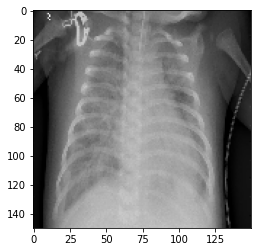

In [22]:
#269
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person1000_bacteria_2931.jpeg', model)

Chest X-ray Status = Pneumonia


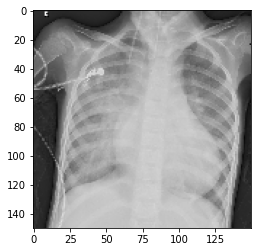

In [27]:
#273
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person1010_bacteria_2941.jpeg', model)

Chest X-ray Status = Pneumonia


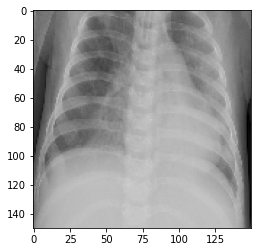

In [23]:
#1040
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person992_bacteria_2920.jpeg', model)

Chest X-ray Status = Pneumonia


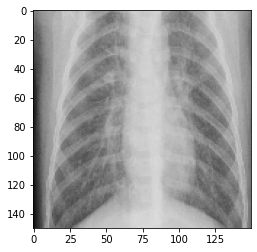

In [24]:
#1043
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person994_virus_1672.jpeg', model)

## True Negative 

In [30]:
## False Positives
df[df["Outcome"]=="TN"].sample(4)

,Filenames,Label,Predict,Outcome
215,NORMAL/NORMAL2-IM-1053-0001.jpeg,0,0,TN
124,NORMAL/NORMAL2-IM-0416-0001-0002.jpeg,0,0,TN
233,NORMAL/NORMAL2-IM-1161-0001.jpeg,0,0,TN
88,NORMAL/IM-0570-0001.jpeg,0,0,TN


Chest X-ray Status = Normal


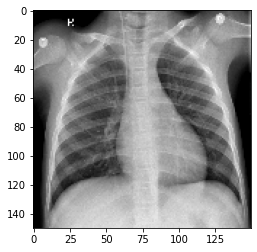

In [31]:
#88
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/IM-0570-0001.jpeg', model)

Chest X-ray Status = Normal


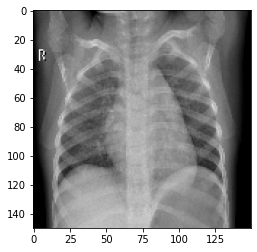

In [32]:
#124
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/NORMAL2-IM-0416-0001-0002.jpeg', model)

Chest X-ray Status = Normal


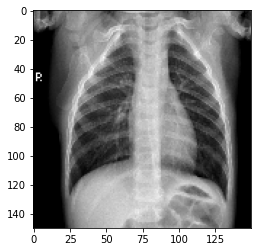

In [33]:
#215
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/NORMAL2-IM-1053-0001.jpeg', model)

Chest X-ray Status = Normal


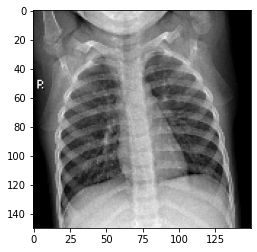

In [34]:
#233
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/NORMAL2-IM-1161-0001.jpeg', model)

## False Positives 

In [35]:
## False Positives
df[df["Outcome"]=="FP"]

,Filenames,Label,Predict,Outcome
7,NORMAL/IM-0178-0001.jpeg,0,1,FP
10,NORMAL/IM-0199-0001.jpeg,0,1,FP
99,NORMAL/IM-0644-0001-0002.jpeg,0,1,FP
108,NORMAL/IM-0687-0001.jpeg,0,1,FP
109,NORMAL/IM-0691-0001.jpeg,0,1,FP
117,NORMAL/IM-0750-0001.jpeg,0,1,FP
189,NORMAL/NORMAL2-IM-0867-0001.jpeg,0,1,FP
213,NORMAL/NORMAL2-IM-1050-0001.jpeg,0,1,FP
251,NORMAL/NORMAL2-IM-1270-0001.jpeg,0,1,FP
268,NORMAL/NORMAL2-IM-1385-0001.jpeg,0,1,FP


Chest X-ray Status = Pneumonia


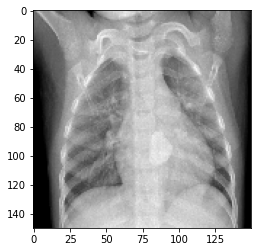

In [36]:
#7
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/IM-0178-0001.jpeg', model)

Chest X-ray Status = Pneumonia


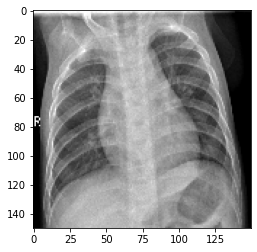

In [37]:
#109
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/IM-0691-0001.jpeg', model)

Chest X-ray Status = Pneumonia


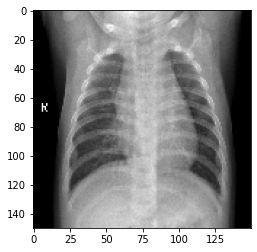

In [38]:
#189
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/NORMAL2-IM-0867-0001.jpeg', model)

Chest X-ray Status = Pneumonia


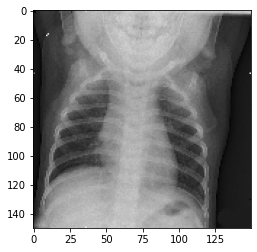

In [39]:
#268
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/NORMAL/NORMAL2-IM-1385-0001.jpeg', model)

## False Negatives

In [40]:
# False Negatives
df[df["Outcome"]=="FN"]

,Filenames,Label,Predict,Outcome
305,PNEUMONIA/person109_virus_203.jpeg,1,0,FN
320,PNEUMONIA/person1138_virus_1877.jpeg,1,0,FN
322,PNEUMONIA/person1142_bacteria_3086.jpeg,1,0,FN
327,PNEUMONIA/person1154_virus_1933.jpeg,1,0,FN
354,PNEUMONIA/person1227_virus_2078.jpeg,1,0,FN
387,PNEUMONIA/person1316_bacteria_3326.jpeg,1,0,FN
405,PNEUMONIA/person1345_bacteria_3426.jpeg,1,0,FN
460,PNEUMONIA/person1469_virus_2547.jpeg,1,0,FN
464,PNEUMONIA/person1480_virus_2566.jpeg,1,0,FN
468,PNEUMONIA/person1483_virus_2574.jpeg,1,0,FN


## 305
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person109_virus_203.jpeg', model)

Chest X-ray Status = Normal


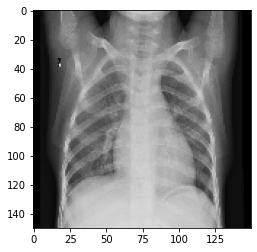

In [42]:
#773
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person472_virus_969.jpeg', model)

Chest X-ray Status = Normal


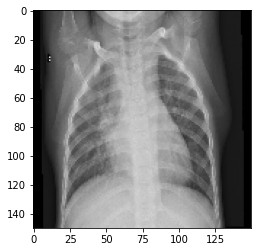

In [44]:
#971
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person765_bacteria_2669.jpeg', model)

Chest X-ray Status = Normal


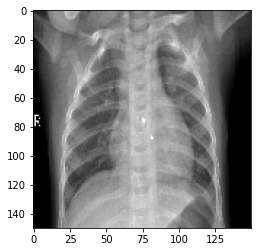

In [43]:
#1021
pneumonia_detector('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test/PNEUMONIA/person946_bacteria_2871.jpeg', model)